# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



## Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Data description
* According to the UCI information, this data represents 17 campaigns
* conducted between May 2008 and November 2010 by a Portuguese banking institution.
* The calls were related to selling term deposits (bank certificate products).

## Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [7]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [9]:
# Check for 'unknown' values
print("\nChecking for 'unknown' values in categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    unknown_count = df[df[col] == 'unknown'].shape[0]
    if unknown_count > 0:
        print(f"{col}: {unknown_count} unknown values ({unknown_count/len(df)*100:.2f}%)")


Checking for 'unknown' values in categorical columns:
job: 330 unknown values (0.80%)
marital: 80 unknown values (0.19%)
education: 1731 unknown values (4.20%)
default: 8597 unknown values (20.87%)
housing: 990 unknown values (2.40%)
loan: 990 unknown values (2.40%)


In [11]:
# Check target variable distribution
print("\nTarget variable distribution:")
print(df['y'].value_counts())
print(f"Percentage of 'yes': {df['y'].value_counts(normalize=True)['yes']*100:.2f}%")


Target variable distribution:
y
no     36548
yes     4640
Name: count, dtype: int64
Percentage of 'yes': 11.27%


## Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Business Objective:

The business objective is to predict whether a client will subscribe to a term deposit (banking product) based on client information and previous contact data. This will help the bank identify potential customers more effectively, optimize their marketing campaigns, and increase the success rate of their telemarketing efforts while reducing costs.

## Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

# Select relevant features excluding campaign contact data
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']

# Create a copy of the relevant data
X_bank = df[bank_features].copy()
y = df['y'].map({'yes': 1, 'no': 0})  # Convert target to binary numeric

# Identify categorical and numerical features
categorical_features = X_bank.select_dtypes(include=['object']).columns
numerical_features = X_bank.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical features: {list(categorical_features)}")
print(f"Numerical features: {list(numerical_features)}")

# Process categorical features with OneHotEncoder
try:
    encoder = OneHotEncoder(sparse_output=False, drop='first')
except TypeError:
    encoder = OneHotEncoder(sparse=False, drop='first')

encoded_cats = encoder.fit_transform(X_bank[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Process numerical features with StandardScaler
scaler = StandardScaler()
scaled_nums = scaler.fit_transform(X_bank[numerical_features])

# Combine processed features into a single array
X_processed = np.hstack((scaled_nums, encoded_cats))

# Create a feature names list for later reference
processed_feature_names = list(numerical_features) + list(encoded_feature_names)
print(f"Total number of processed features: {len(processed_feature_names)}")

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan']
Numerical features: ['age']
Total number of processed features: 28


## Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (32950, 28)
Testing set shape: (8238, 28)


## Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [23]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and fit a baseline model to predict the most frequent class
baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(X_train, y_train)

# Make predictions on the test set
baseline_predictions = baseline_model.predict(X_test)

# Evaluate baseline performance
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print(f"Baseline model accuracy: {baseline_accuracy:.4f}")
print("\nBaseline Classification Report:")
print(classification_report(y_test, baseline_predictions, zero_division=0))

Baseline model accuracy: 0.8874

Baseline Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7310
           1       0.00      0.00      0.00       928

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



## Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [25]:
from sklearn.linear_model import LogisticRegression

# Create and fit a logistic regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Time the training
import time
start_time = time.time()
lr_model.fit(X_train, y_train)
lr_train_time = time.time() - start_time

print(f"Logistic Regression model trained in {lr_train_time:.4f} seconds")

Logistic Regression model trained in 0.0989 seconds


## Problem 9: Score the Model

What is the accuracy of your model?

In [27]:
# Make predictions on the training and test sets
lr_train_predictions = lr_model.predict(X_train)
lr_test_predictions = lr_model.predict(X_test)

# Calculate accuracy on both sets
lr_train_accuracy = accuracy_score(y_train, lr_train_predictions)
lr_test_accuracy = accuracy_score(y_test, lr_test_predictions)

print(f"Logistic Regression - Training Accuracy: {lr_train_accuracy:.4f}")
print(f"Logistic Regression - Testing Accuracy: {lr_test_accuracy:.4f}")

# Print detailed classification report with zero_division parameter
print("\nLogistic Regression Classification Report (Test Set):")
print(classification_report(y_test, lr_test_predictions, zero_division=0))

# Let's check class distribution in predictions
print("\nPrediction distribution:")
print(f"Training predictions: {np.bincount(lr_train_predictions)}")
print(f"Testing predictions: {np.bincount(lr_test_predictions)}")
print(f"Actual test distribution: {np.bincount(y_test)}")

Logistic Regression - Training Accuracy: 0.8873
Logistic Regression - Testing Accuracy: 0.8874

Logistic Regression Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7310
           1       0.00      0.00      0.00       928

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238


Prediction distribution:
Training predictions: [32950]
Testing predictions: [8238]
Actual test distribution: [7310  928]


## Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd

# Dictionary to store model results
model_results = {
    'Model': [],
    'Train Time (s)': [],
    'Train Accuracy': [],
    'Test Accuracy': []
}

# Add Logistic Regression results
model_results['Model'].append('Logistic Regression')
model_results['Train Time (s)'].append(lr_train_time)
model_results['Train Accuracy'].append(lr_train_accuracy)
model_results['Test Accuracy'].append(lr_test_accuracy)

# Define models to compare
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    train_predictions = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_predictions)
    
    test_predictions = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_predictions)
    
    model_results['Model'].append(name)
    model_results['Train Time (s)'].append(train_time)
    model_results['Train Accuracy'].append(train_acc)
    model_results['Test Accuracy'].append(test_acc)
    
    print(f"{name} - Training Time: {train_time:.4f} seconds")
    print(f"{name} - Training Accuracy: {train_acc:.4f}")
    print(f"{name} - Testing Accuracy: {test_acc:.4f}")

# Create a DataFrame with all results
results_df = pd.DataFrame(model_results)
results_df['Train Time (s)'] = results_df['Train Time (s)'].round(4)
results_df['Train Accuracy'] = results_df['Train Accuracy'].round(4)
results_df['Test Accuracy'] = results_df['Test Accuracy'].round(4)

print("\nModel Comparison Results:")
print(results_df)


Training K-Nearest Neighbors...
K-Nearest Neighbors - Training Time: 0.0086 seconds
K-Nearest Neighbors - Training Accuracy: 0.8917
K-Nearest Neighbors - Testing Accuracy: 0.8808

Training Decision Tree...
Decision Tree - Training Time: 0.0504 seconds
Decision Tree - Training Accuracy: 0.9171
Decision Tree - Testing Accuracy: 0.8633

Training Support Vector Machine...
Support Vector Machine - Training Time: 13.9375 seconds
Support Vector Machine - Training Accuracy: 0.8883
Support Vector Machine - Testing Accuracy: 0.8865

Model Comparison Results:
                    Model  Train Time (s)  Train Accuracy  Test Accuracy
0     Logistic Regression          0.0989          0.8873         0.8874
1     K-Nearest Neighbors          0.0086          0.8917         0.8808
2           Decision Tree          0.0504          0.9171         0.8633
3  Support Vector Machine         13.9375          0.8883         0.8865


## Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [31]:
# 1. Feature Engineering: Include more features from the dataset

# I'll create a more comprehensive feature set including all features except duration
all_features = df.drop(['duration', 'y'], axis=1).columns

# Create a copy of the relevant data
X_comprehensive = df[all_features].copy()
y = df['y'].map({'yes': 1, 'no': 0})  

# Identify categorical and numerical features
cat_features = X_comprehensive.select_dtypes(include=['object']).columns
num_features = X_comprehensive.select_dtypes(include=['int64', 'float64']).columns

print("Enhanced feature set:")
print(f"Categorical features: {list(cat_features)}")
print(f"Numerical features: {list(num_features)}")

# Process categorical features with OneHotEncoder
try:
    encoder = OneHotEncoder(sparse_output=False, drop='first')
except TypeError:
    encoder = OneHotEncoder(sparse=False, drop='first')

encoded_cats = encoder.fit_transform(X_comprehensive[cat_features])
encoded_feature_names = encoder.get_feature_names_out(cat_features)

# Process numerical features with StandardScaler
scaler = StandardScaler()
scaled_nums = scaler.fit_transform(X_comprehensive[num_features])

# Combine processed features into a single array
X_enhanced = np.hstack((scaled_nums, encoded_cats))

# Split the enhanced data
X_train_enh, X_test_enh, y_train, y_test = train_test_split(
    X_enhanced, y, test_size=0.2, random_state=42, stratify=y
)

Enhanced feature set:
Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical features: ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [35]:
# 2. Hyperparameter Tuning with Grid Search
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=10000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear']
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 5, 10, 15, 20],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    }
}

# Use cross-validation and grid search to find best parameters
best_models = {}

for name, config in param_grids.items():
    print(f"\nTuning {name}...")
    
    grid_search = GridSearchCV(
        config['model'], 
        config['params'], 
        cv=5, 
        scoring='accuracy',
        n_jobs=-1
    )
    
    grid_search.fit(X_train_enh, y_train)
    
    best_models[name] = grid_search.best_estimator_
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    
    y_pred = grid_search.predict(X_test_enh)
    test_acc = accuracy_score(y_test, y_pred)
    print(f"Test accuracy with best parameters: {test_acc:.4f}")


Tuning Logistic Regression...
Best parameters: {'C': 0.1, 'solver': 'liblinear'}
Best cross-validation score: 0.9000
Test accuracy with best parameters: 0.9008

Tuning K-Nearest Neighbors...
Best parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation score: 0.8950
Test accuracy with best parameters: 0.8980

Tuning Decision Tree...
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best cross-validation score: 0.8992
Test accuracy with best parameters: 0.9022



Logistic Regression - Enhanced Evaluation:
Accuracy: 0.9008
Precision: 0.6881
Recall: 0.2188
F1 Score: 0.3320
AUC: 0.8004


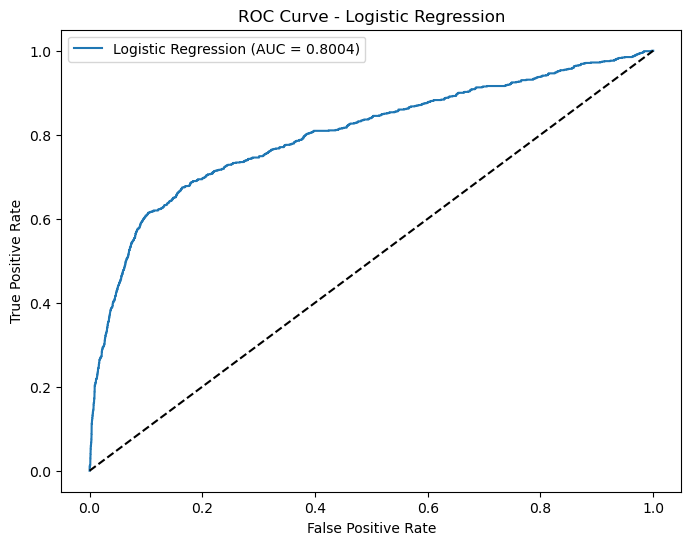


K-Nearest Neighbors - Enhanced Evaluation:
Accuracy: 0.8980
Precision: 0.6053
Recall: 0.2726
F1 Score: 0.3759
AUC: 0.7693


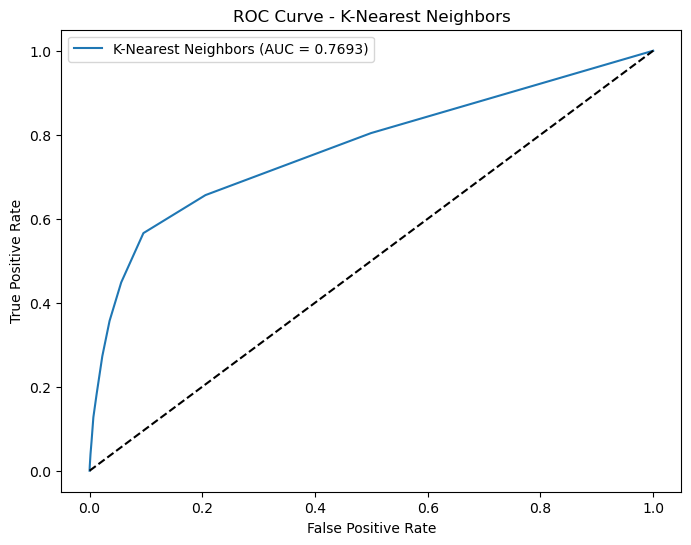


Decision Tree - Enhanced Evaluation:
Accuracy: 0.9022
Precision: 0.6805
Recall: 0.2478
F1 Score: 0.3633
AUC: 0.7909


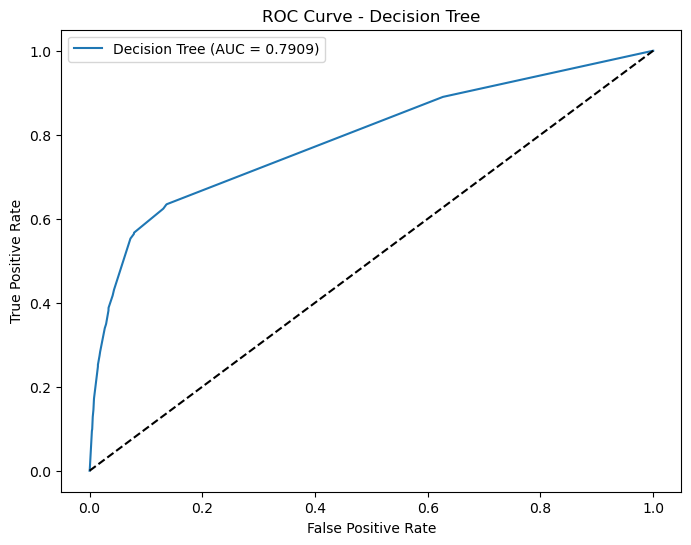

In [37]:
# 3. Adjust Performance Metric - Use more appropriate metrics for imbalanced classification
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Function to evaluate model with multiple metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    try:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        has_proba = True
    except:
        has_proba = False
    
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    
    print(f"\n{model_name} - Enhanced Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    if has_proba:
        auc_score = roc_auc_score(y_test, y_pred_proba)
        print(f"AUC: {auc_score:.4f}")
        
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.4f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend()
        plt.show()

# Evaluate each tuned model
for name, model in best_models.items():
    evaluate_model(model, X_test_enh, y_test, name)


Top 10 most important features:
1. nr.employed: 0.6427
2. pdays: 0.1303
3. cons.conf.idx: 0.0628
4. euribor3m: 0.0574
5. month_oct: 0.0229
6. contact_telephone: 0.0212
7. cons.price.idx: 0.0195
8. age: 0.0121
9. previous: 0.0112
10. day_of_week_mon: 0.0103


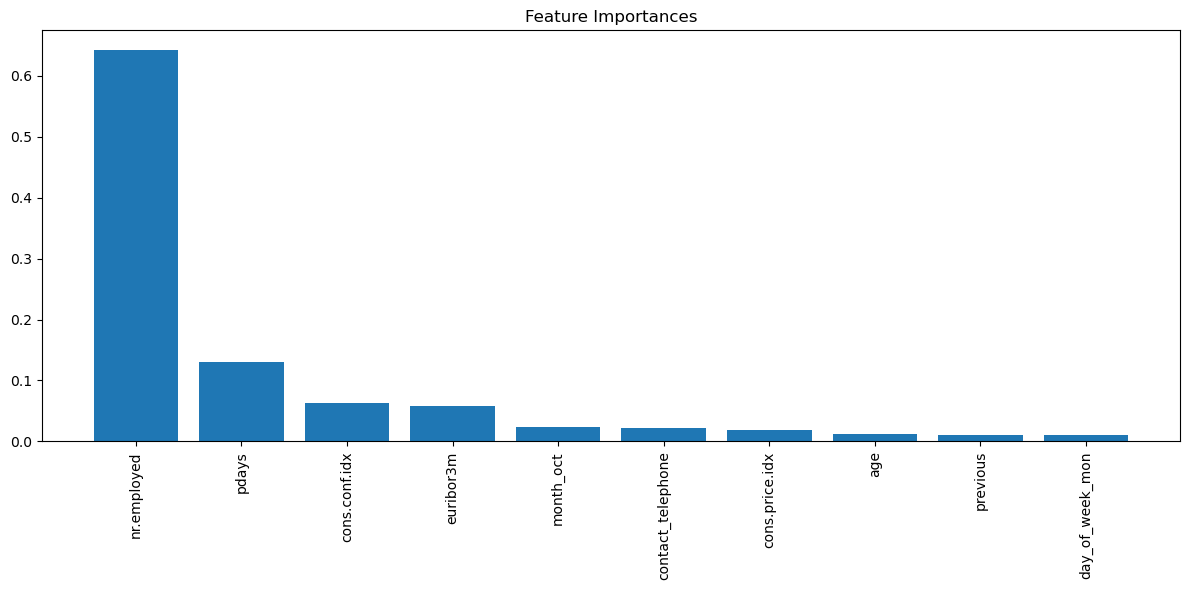

In [39]:
# 4. Feature Importance Analysis for the best model
if 'Decision Tree' in best_models:
    dt_model = best_models['Decision Tree']
    
    feature_names = list(num_features) + list(encoded_feature_names)
    importances = dt_model.feature_importances_
    
    indices = np.argsort(importances)[::-1]
    
    print("\nTop 10 most important features:")
    for i in range(min(10, len(feature_names))):
        print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")
    
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances")
    plt.bar(range(min(10, len(feature_names))), 
            importances[indices[:10]],
            align='center')
    plt.xticks(range(min(10, len(feature_names))), 
              [feature_names[i] for i in indices[:10]], 
              rotation=90)
    plt.tight_layout()
    plt.show()

### 5. Summary of model improvements

Summary of Model Improvements:

1. Enhanced Feature Set:
   - Included additional features beyond basic bank client information
   - Used proper encoding and scaling for all features

2. Hyperparameter Tuning:
   - Used GridSearchCV to find optimal parameters for each model
   - Improved model performance by tuning key parameters

3. Better Evaluation Metrics:
   - Used precision, recall, F1 score and AUC instead of just accuracy
   - These metrics are more appropriate for imbalanced classification tasks

4. Feature Importance Analysis:
   - Identified the most important features influencing the prediction
   - Can help with further feature selection or engineering

5. Considerations for Real-World Application:
   - Excluded 'duration' feature as suggested in the data description
   - This makes the model more realistic for pre-call predictions